In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())
import matplotlib
myfonts = "Times New Roman"
matplotlib.rcParams['font.family'] = myfonts

datas_full = ['mini_test', 'tiered_test', "places", "plantae", "cars", "cub", 'crop','euro', 'isic', 'chest']
datas_name = ['miniIN', 'tieredIN', 'Places', 'Plantae', 'Cars', 'CUB','CropDiseases', 'EuroSAT', 'ISIC', 'ChestX']

['sans-serif']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [161]:
result = pd.DataFrame(None, index=datas_full, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        last_acc = test_acc.mean()[-1] * 100
        last_std = 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100
        best_acc = test_acc.max(axis=1).mean() * 100
        best_std = 1.96 * test_acc.max(axis=1).std() / np.sqrt(600) * 100
        epg = best_acc - last_acc
        fmt = "{:.2f} ± {:.2f} | {:.2f} ± {:.2f} | {:.2f}%".format(last_acc, last_std, best_acc, best_std, epg)
        result.loc[data][bs] = fmt
display(result)

,1shot,5shot
mini_test,49.71 ± 0.78 | 57.66 ± 0.71 | 7.95%,75.88 ± 0.64 | 81.32 ± 0.58 | 5.43%
tiered_test,49.10 ± 0.90 | 57.12 ± 0.83 | 8.03%,73.60 ± 0.78 | 79.01 ± 0.71 | 5.40%
places,45.44 ± 0.79 | 53.94 ± 0.72 | 8.50%,70.05 ± 0.71 | 76.07 ± 0.64 | 6.02%
plantae,33.35 ± 0.59 | 40.81 ± 0.55 | 7.46%,53.19 ± 0.73 | 59.27 ± 0.69 | 6.09%
cars,29.49 ± 0.54 | 37.05 ± 0.47 | 7.55%,49.26 ± 0.70 | 55.21 ± 0.65 | 5.95%
cub,37.54 ± 0.71 | 45.03 ± 0.66 | 7.49%,59.35 ± 0.80 | 64.88 ± 0.76 | 5.53%
crop,67.10 ± 0.91 | 76.02 ± 0.78 | 8.93%,92.06 ± 0.51 | 95.46 ± 0.39 | 3.40%
euro,56.39 ± 0.86 | 66.91 ± 0.76 | 10.52%,82.68 ± 0.60 | 88.29 ± 0.51 | 5.61%
isic,30.71 ± 0.56 | 38.56 ± 0.49 | 7.84%,48.25 ± 0.64 | 54.50 ± 0.57 | 6.25%
chest,22.10 ± 0.37 | 29.69 ± 0.29 | 7.59%,26.35 ± 0.42 | 33.01 ± 0.36 | 6.66%


In [159]:
result = pd.DataFrame(None, index=datas_full, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        last_acc = test_acc.mean()[-1] * 100
        last_std = 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100
        best_acc = test_acc.max(axis=1).mean() * 100
        best_std = 1.96 * test_acc.max(axis=1).std() / np.sqrt(600) * 100
        epg = best_acc - last_acc
        fmt = "{:.2f} ± {:.2f} | {:.2f} ± {:.2f} | {:.2f}%".format(last_acc, last_std, best_acc, best_std, epg)
        result.loc[data][bs] = fmt
display(result)

,1shot,5shot
mini_test,56.47 ± 0.80 | 59.62 ± 0.76 | 3.15%,77.95 ± 0.61 | 80.31 ± 0.58 | 2.36%
tiered_test,55.89 ± 0.96 | 59.34 ± 0.91 | 3.45%,74.79 ± 0.76 | 77.58 ± 0.71 | 2.79%
places,52.23 ± 0.80 | 55.85 ± 0.76 | 3.62%,73.01 ± 0.67 | 76.08 ± 0.63 | 3.06%
plantae,36.87 ± 0.67 | 41.37 ± 0.62 | 4.50%,53.85 ± 0.74 | 57.54 ± 0.70 | 3.69%
cars,29.84 ± 0.54 | 34.73 ± 0.48 | 4.89%,44.64 ± 0.67 | 48.76 ± 0.62 | 4.12%
cub,40.42 ± 0.76 | 44.33 ± 0.72 | 3.90%,57.51 ± 0.79 | 60.88 ± 0.74 | 3.36%
crop,73.12 ± 0.88 | 77.51 ± 0.81 | 4.39%,91.50 ± 0.49 | 93.33 ± 0.43 | 1.83%
euro,64.72 ± 0.88 | 69.10 ± 0.84 | 4.38%,84.08 ± 0.60 | 86.47 ± 0.56 | 2.39%
isic,29.39 ± 0.53 | 34.69 ± 0.48 | 5.30%,40.39 ± 0.55 | 45.01 ± 0.50 | 4.63%
chest,22.56 ± 0.40 | 28.97 ± 0.30 | 6.41%,26.56 ± 0.43 | 32.69 ± 0.37 | 6.13%


In [ ]:
[data]*600

In [157]:
test_acc.iloc[:,-1].max()

93.33333373069765

In [158]:
test_acc.iloc[:,-1].min()

18.66666674613952

In [155]:
path = './logs/baseline/output/resnet10_simclr_LS_default/tiered_test/05way_001shot_head_default/test_history.csv'.format(data)
test_acc = pd.read_csv(path, index_col='Unnamed: 0')*100

### between episodes

/tmp/ipykernel_20448/1691867232.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(np.arange(0, 101, 20), fontsize = 40)


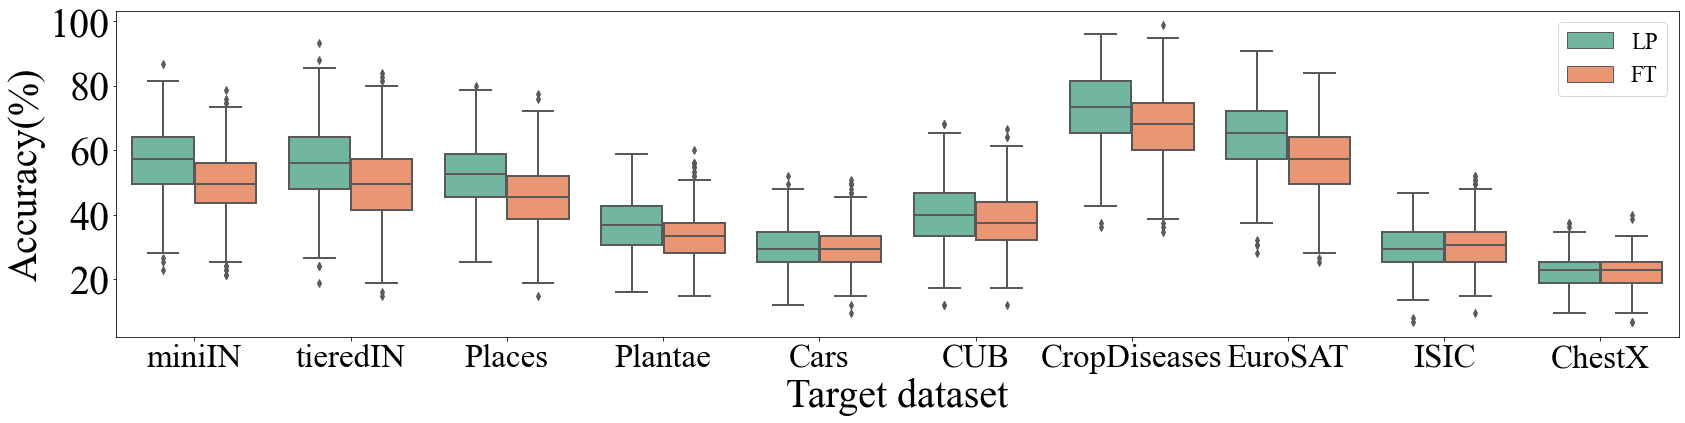

<Figure size 1800x432 with 0 Axes>

In [13]:
df = pd.DataFrame()
df_f = pd.DataFrame()
data_list = []
hf_list = []
epg_list = []
for data in datas_full:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data)
    path_f = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data)
    
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')*100
    test_acc_f = pd.read_csv(path_f, index_col='Unnamed: 0')*100
    epg = test_acc.iloc[:,-1]
    epg_f = test_acc_f.iloc[:,-1]
    
    data_list = data_list + [data]*1200
    epg_list = epg_list + list(epg) + list(epg_f)
    hf_list = hf_list + ["LP"]*600+["FT"]*600
df['data'] = data_list
df['hf'] = hf_list
df['epg'] = epg_list
plt.figure(figsize=(28,6))
p = sns.boxplot(x="data", 
            y="epg", 
            hue="hf",
            data=df,
            palette="Set2")

# df_f = pd.concat([df_f, epg_f], axis = 1)
fig = plt.figure(figsize=(25,6))
# ax = fig.add_subplot(1, 1, 1) 
p.set_xticklabels(datas_name, fontsize=33)
p.set_yticklabels(np.arange(0, 101, 20), fontsize = 40)
# ax.boxplot(df)
# ax.boxplot(df_f)
# #plt.title("5 way 1 shot", fontsize = 25)
p.set_xlabel("Target dataset", fontsize = 40)
p.set_ylabel("Accuracy(%)", fontsize = 40)
p.legend(bbox_to_anchor = (1,1), loc=1)
fig = p.get_figure()
p.figure.savefig('./img_pdf/instability/between/1shot_mini.pdf', bbox_inches='tight', format='pdf')


/tmp/ipykernel_20448/2092052440.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(np.arange(0, 101, 20), fontsize = 40)


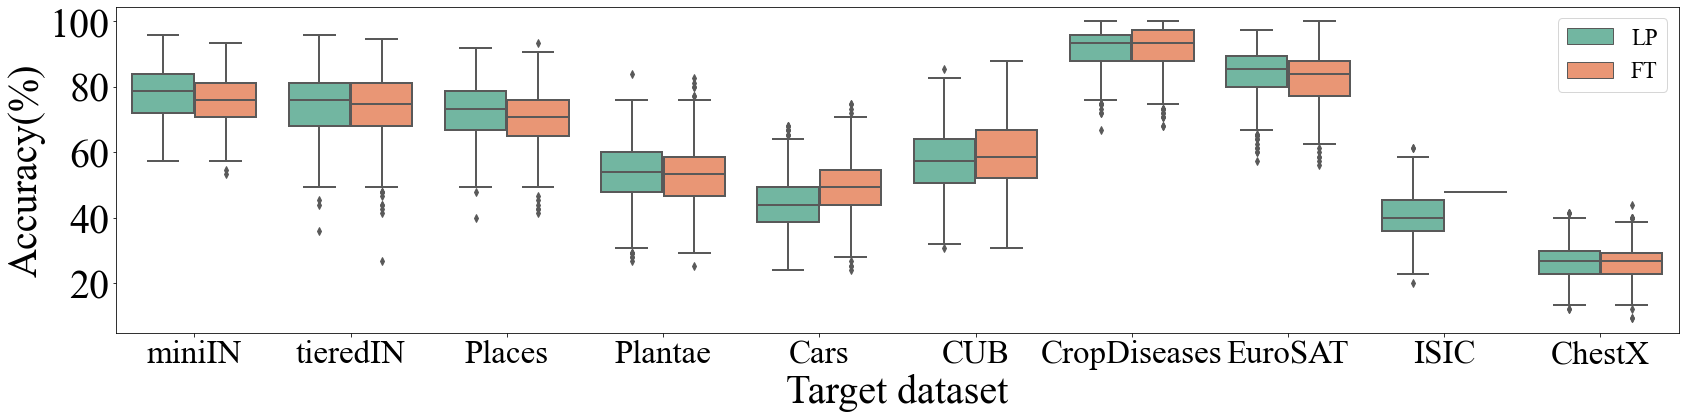

<Figure size 1800x432 with 0 Axes>

In [17]:
df = pd.DataFrame()
df_f = pd.DataFrame()
data_list = []
hf_list = []
epg_list = []
for data in datas_full:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv'.format(data)
    path_f = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data)
    
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')*100
    test_acc_f = pd.read_csv(path_f, index_col='Unnamed: 0')*100
    epg = test_acc.iloc[:,-1]
    epg_f = test_acc_f.iloc[:,-1]
    
    data_list = data_list + [data]*1200
    epg_list = epg_list + list(epg) + list(epg_f)
    hf_list = hf_list + ["LP"]*600+["FT"]*600
df['data'] = data_list
df['hf'] = hf_list
df['epg'] = epg_list
plt.figure(figsize=(28,6))
p = sns.boxplot(x="data", 
            y="epg", 
            hue="hf",
            data=df,
            palette="Set2")

# df_f = pd.concat([df_f, epg_f], axis = 1)
fig = plt.figure(figsize=(25,6))
# ax = fig.add_subplot(1, 1, 1) 
p.set_xticklabels(datas_name, fontsize=33)
p.set_yticklabels(np.arange(0, 101, 20), fontsize = 40)
# ax.boxplot(df)
# ax.boxplot(df_f)
# #plt.title("5 way 1 shot", fontsize = 25)
p.set_xlabel("Target dataset", fontsize = 40)
p.set_ylabel("Accuracy(%)", fontsize = 40)
p.legend(bbox_to_anchor = (1,1), loc=1)

p.figure.savefig('./img_pdf/instability/between/5shot_mini.pdf', bbox_inches='tight', format='pdf')


/tmp/ipykernel_20448/4241678442.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(np.arange(0, 101, 20), fontsize = 40)


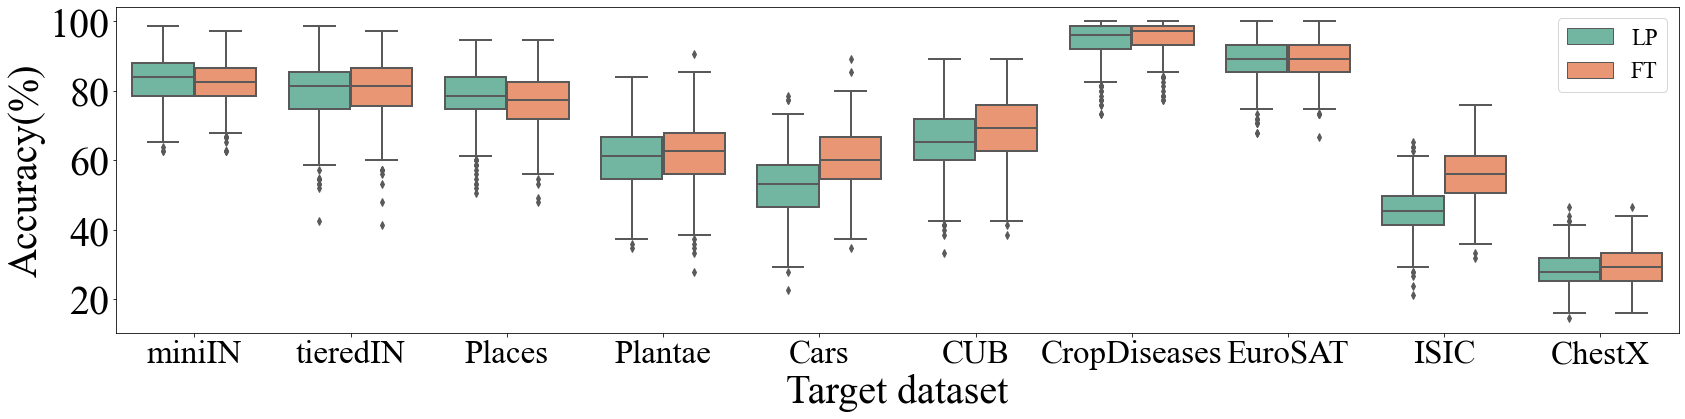

<Figure size 1800x432 with 0 Axes>

In [18]:
df = pd.DataFrame()
df_f = pd.DataFrame()
data_list = []
hf_list = []
epg_list = []
for data in datas_full:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_010shot_head_default/test_history.csv'.format(data)
    path_f = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_010shot_full_default/test_history.csv'.format(data)
    
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')*100
    test_acc_f = pd.read_csv(path_f, index_col='Unnamed: 0')*100
    epg = test_acc.iloc[:,-1]
    epg_f = test_acc_f.iloc[:,-1]
    
    data_list = data_list + [data]*1200
    epg_list = epg_list + list(epg) + list(epg_f)
    hf_list = hf_list + ["LP"]*600+["FT"]*600
df['data'] = data_list
df['hf'] = hf_list
df['epg'] = epg_list
plt.figure(figsize=(28,6))
p = sns.boxplot(x="data", 
            y="epg", 
            hue="hf",
            data=df,
            palette="Set2")

# df_f = pd.concat([df_f, epg_f], axis = 1)
fig = plt.figure(figsize=(25,6))
# ax = fig.add_subplot(1, 1, 1) 
p.set_xticklabels(datas_name, fontsize=33)
p.set_yticklabels(np.arange(0, 101, 20), fontsize = 40)
# ax.boxplot(df)
# ax.boxplot(df_f)
# #plt.title("5 way 1 shot", fontsize = 25)
p.set_xlabel("Target dataset", fontsize = 40)
p.set_ylabel("Accuracy(%)", fontsize = 40)
p.legend(bbox_to_anchor = (1,1), loc=1)

p.figure.savefig('./img_pdf/instability/between/10shot_mini.pdf', bbox_inches='tight', format='pdf')


/tmp/ipykernel_20448/354069854.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(np.arange(0, 101, 20), fontsize = 40)


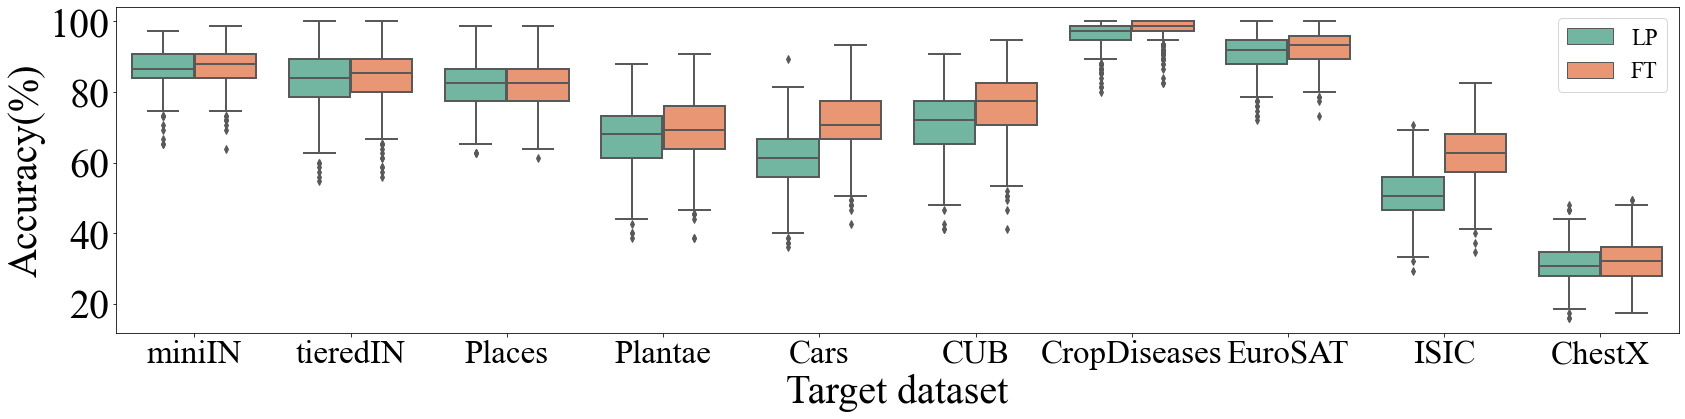

<Figure size 1800x432 with 0 Axes>

In [16]:
df = pd.DataFrame()
df_f = pd.DataFrame()
data_list = []
hf_list = []
epg_list = []
for data in datas_full:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_head_default/test_history.csv'.format(data)
    path_f = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/test_history.csv'.format(data)
    
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')*100
    test_acc_f = pd.read_csv(path_f, index_col='Unnamed: 0')*100
    epg = test_acc.iloc[:,-1]
    epg_f = test_acc_f.iloc[:,-1]
    
    data_list = data_list + [data]*1200
    epg_list = epg_list + list(epg) + list(epg_f)
    hf_list = hf_list + ["LP"]*600+["FT"]*600
df['data'] = data_list
df['hf'] = hf_list
df['epg'] = epg_list
plt.figure(figsize=(28,6))
p = sns.boxplot(x="data", 
            y="epg", 
            hue="hf",
            data=df,
            palette="Set2")

# df_f = pd.concat([df_f, epg_f], axis = 1)
fig = plt.figure(figsize=(25,6))
# ax = fig.add_subplot(1, 1, 1) 
p.set_xticklabels(datas_name, fontsize=33)
p.set_yticklabels(np.arange(0, 101, 20), fontsize = 40)
# ax.boxplot(df)
# ax.boxplot(df_f)
# #plt.title("5 way 1 shot", fontsize = 25)
p.set_xlabel("Target dataset", fontsize = 40)
p.set_ylabel("Accuracy(%)", fontsize = 40)
p.legend(bbox_to_anchor = (1,1), loc=1)

p.figure.savefig('./img_pdf/instability/between/20shot_mini.pdf', bbox_inches='tight', format='pdf')


### within episodes

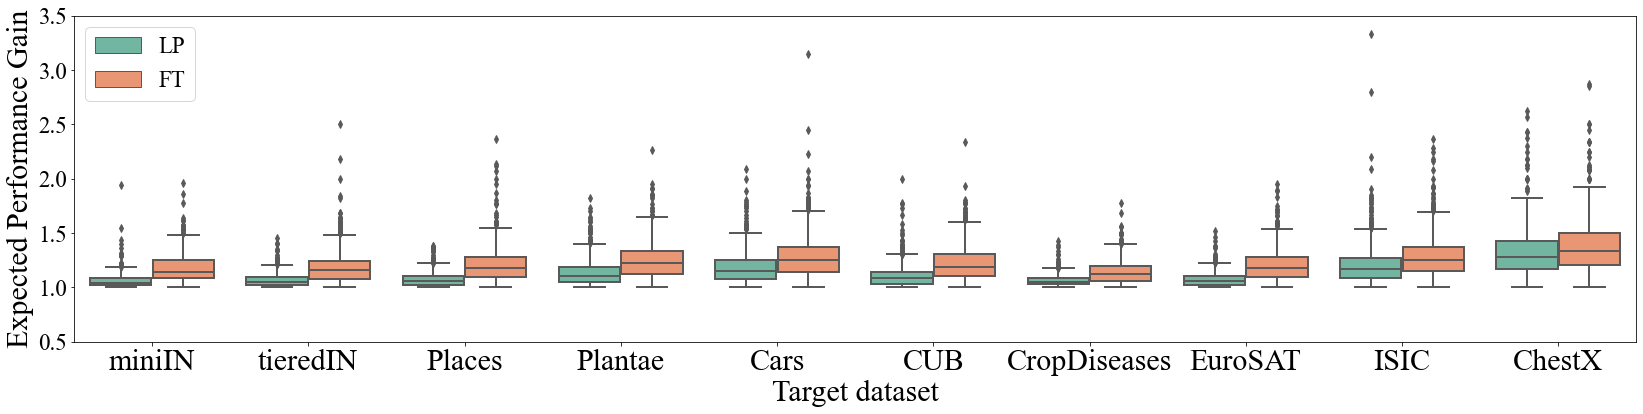

<Figure size 1800x432 with 0 Axes>

In [139]:
df = pd.DataFrame()
df_f = pd.DataFrame()
data_list = []
hf_list = []
epg_list = []
for data in datas_full:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data)
    path_f = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data)
    
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    test_acc_f = pd.read_csv(path_f, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    epg_f = test_acc_f.max(axis=1) / test_acc_f.iloc[:,-1]
    
    data_list = data_list + [data]*1200
    epg_list = epg_list + list(epg) + list(epg_f)
    hf_list = hf_list + ["LP"]*600+["FT"]*600
df['data'] = data_list
df['hf'] = hf_list
df['epg'] = epg_list
plt.figure(figsize=(28,6))
p = sns.boxplot(x="data", 
            y="epg", 
            hue="hf",
            data=df,
            palette="Set2")

# df_f = pd.concat([df_f, epg_f], axis = 1)
fig = plt.figure(figsize=(25,6))
# ax = fig.add_subplot(1, 1, 1) 
p.set(ylim=(0.5, 3.5))
p.set_xticklabels(datas_name, fontsize=30)
#p.set_yticklabels(np.arange(0.5, 3.5, step=0.5) ,fontsize = 30)
# ax.boxplot(df)
# ax.boxplot(df_f)
# #plt.title("5 way 1 shot", fontsize = 25)
p.set_xlabel("Target dataset", fontsize = 30)
p.set_ylabel("Expected Performance Gain", fontsize = 30)
p.legend(bbox_to_anchor = (0,1), loc=2)

p.figure.savefig('./img_pdf/instability/within/1shot_mini.pdf', bbox_inches='tight', format='pdf')


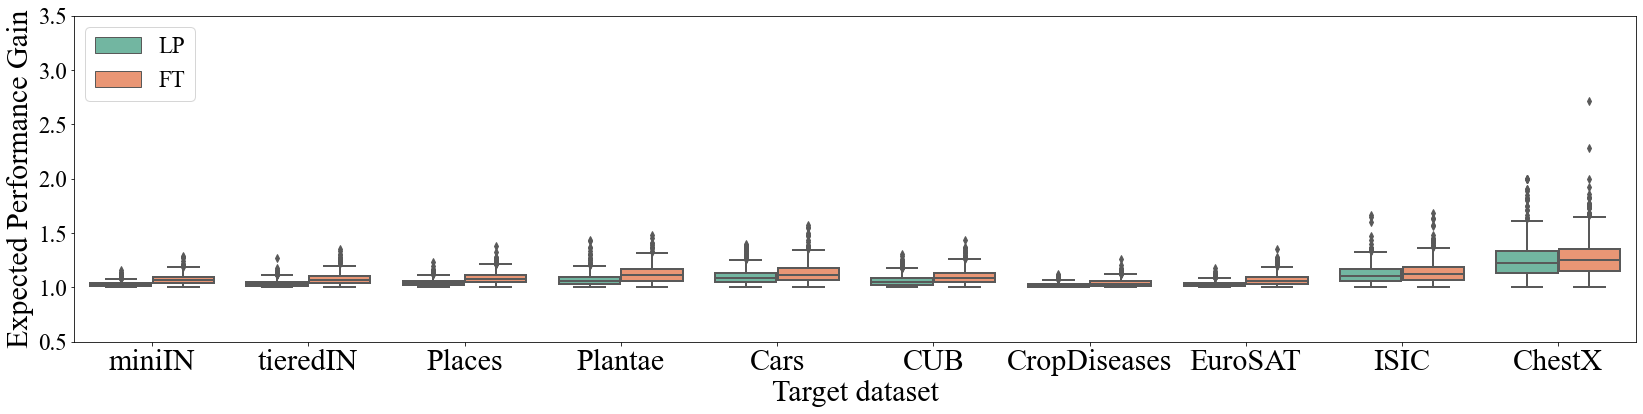

<Figure size 1800x432 with 0 Axes>

In [148]:
df = pd.DataFrame()
df_f = pd.DataFrame()
data_list = []
hf_list = []
epg_list = []
for data in datas_full:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv'.format(data)
    path_f = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data)
    
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    test_acc_f = pd.read_csv(path_f, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    epg_f = test_acc_f.max(axis=1) / test_acc_f.iloc[:,-1]
    
    data_list = data_list + [data]*1200
    epg_list = epg_list + list(epg) + list(epg_f)
    hf_list = hf_list + ["LP"]*600+["FT"]*600
df['data'] = data_list
df['hf'] = hf_list
df['epg'] = epg_list
plt.figure(figsize=(28,6))
p = sns.boxplot(x="data", 
            y="epg", 
            hue="hf",
            data=df,
            palette="Set2")

# df_f = pd.concat([df_f, epg_f], axis = 1)
fig = plt.figure(figsize=(25,6))
# ax = fig.add_subplot(1, 1, 1) 
p.set(ylim=(0.5, 3.5))
p.set_xticklabels(datas_name, fontsize=30)
#p.set_yticklabels(np.arange(0.5, 3.5, step=0.5) ,fontsize = 30)
# ax.boxplot(df)
# ax.boxplot(df_f)
# #plt.title("5 way 1 shot", fontsize = 25)
p.set_xlabel("Target dataset", fontsize = 30)
p.set_ylabel("Expected Performance Gain", fontsize = 30)
p.legend(bbox_to_anchor = (0,1), loc=2)

p.figure.savefig('./img_pdf/instability/within/5shot_mini.pdf', bbox_inches='tight', format='pdf')


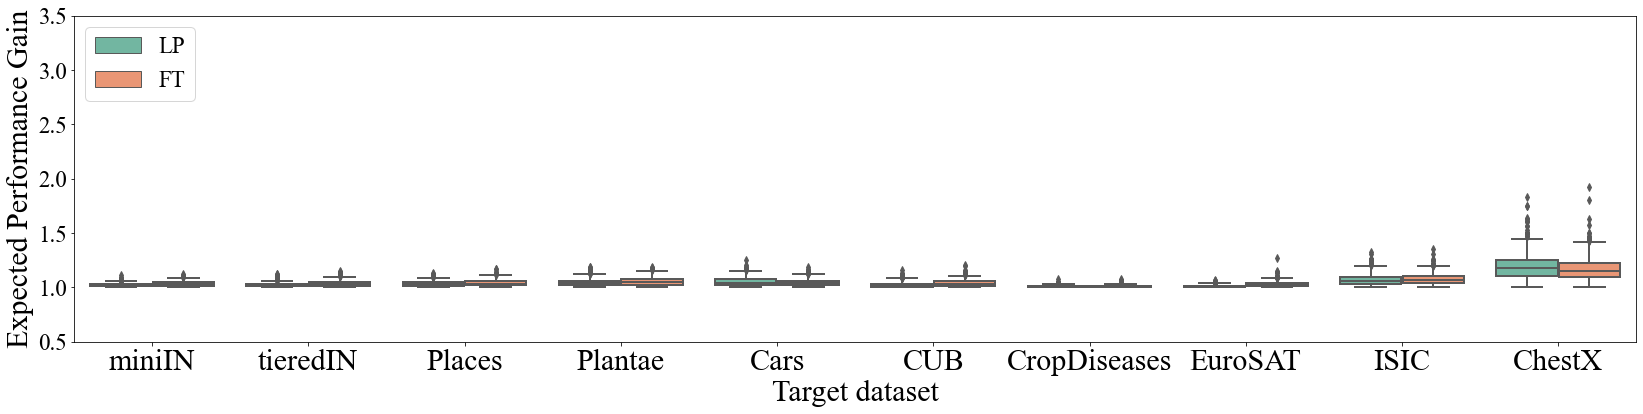

<Figure size 1800x432 with 0 Axes>

In [149]:
df = pd.DataFrame()
df_f = pd.DataFrame()
data_list = []
hf_list = []
epg_list = []
for data in datas_full:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_head_default/test_history.csv'.format(data)
    path_f = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/test_history.csv'.format(data)
    
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    test_acc_f = pd.read_csv(path_f, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    epg_f = test_acc_f.max(axis=1) / test_acc_f.iloc[:,-1]
    
    data_list = data_list + [data]*1200
    epg_list = epg_list + list(epg) + list(epg_f)
    hf_list = hf_list + ["LP"]*600+["FT"]*600
df['data'] = data_list
df['hf'] = hf_list
df['epg'] = epg_list
plt.figure(figsize=(28,6))
p = sns.boxplot(x="data", 
            y="epg", 
            hue="hf",
            data=df,
            palette="Set2")

# df_f = pd.concat([df_f, epg_f], axis = 1)
fig = plt.figure(figsize=(25,6))
# ax = fig.add_subplot(1, 1, 1) 
p.set(ylim=(0.5, 3.5))
p.set_xticklabels(datas_name, fontsize=30)
#p.set_yticklabels(fontsize = 30)
# ax.boxplot(df)
# ax.boxplot(df_f)
# #plt.title("5 way 1 shot", fontsize = 25)
p.set_xlabel("Target dataset", fontsize = 30)
p.set_ylabel("Expected Performance Gain", fontsize = 30)
p.legend(bbox_to_anchor = (0,1), loc=2)

p.figure.savefig('./img_pdf/instability/within/20shot_mini.pdf', bbox_inches='tight', format='pdf')


In [162]:
df = pd.DataFrame()
df_f = pd.DataFrame()
data_list = []
hf_list = []
epg_list = []
for data in datas_full:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data)
    path_f = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data)
    
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')*100
    test_acc_f = pd.read_csv(path_f, index_col='Unnamed: 0')*100
    epg = test_acc.iloc[:,-1]
    epg_f = test_acc_f.iloc[:,-1]
    
    data_list = data_list + [data]*1200
    epg_list = epg_list + list(epg) + list(epg_f)
    hf_list = hf_list + ["LP"]*600+["FT"]*600
df['data'] = data_list
df['hf'] = hf_list
df['epg'] = epg_list
